In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Downloads\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  
0           203.319595  
1           402.197302  
2           553.132096  
3           292.430579  
4           246.540576  
2
(15290, 7)


In [3]:
# pd.get_dummies allows to convert a categorical variable into dummy variables
# Create a set of dummy variables from the sex variable
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Married], axis=1)         
df_new.head()    

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,F,M,Married,Single
0,150024,24,5,1,M,Married,203.319595,0,1,1,0
1,144880,31,10,1,F,Single,402.197302,1,0,0,1
2,133742,56,37,1,M,Married,553.132096,0,1,1,0
3,151282,52,31,1,F,Married,292.430579,1,0,1,0
4,174407,20,3,1,M,Single,246.540576,0,1,0,1


In [4]:
dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5)) 


   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576


In [14]:
dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})
print(dfClean.head(5)) 

import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
results = smf.ols('LTh ~ Age + nVeh + F + Single', data=dfClean).fit()
print(results.summary())

   Age  nVeh  F  Single         LTh
0   24     1  0       0  203.319595
1   31     1  1       1  402.197302
2   56     1  0       0  553.132096
3   52     1  1       0  292.430579
4   20     1  0       1  246.540576
                            OLS Regression Results                            
Dep. Variable:                    LTh   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1652.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        08:27:05   Log-Likelihood:            -1.0360e+05
No. Observations:               15290   AIC:                         2.072e+05
Df Residuals:                   15285   BIC:                         2.072e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                    

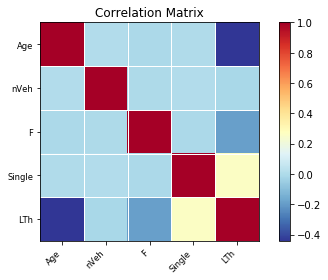

In [16]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(dfClean.T)
smg.plot_corr(corr_matrix, xnames=dfClean.columns)
plt.show()

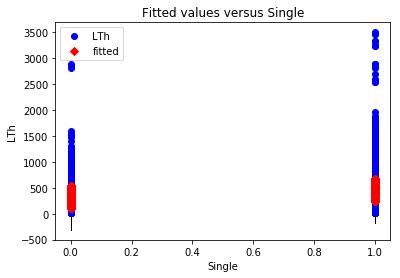

In [22]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 4, ax=ax) # change 1 to 4
plt.show()